In [ ]:
Autores:
Diego Armando Salazar Barreto
Saby Espinel Galvan

# Exercise 01.1

Create a function that receives two inputs a and b, and returns the product of the a decimal of pi and the b decimal of pi.

```
i.e, 
pi = 3.14159
if a = 2 and b = 4
result = 4 * 5
result = 20
```

Caveats:
- a and b are between 1 and 15
- decimals positions 1 and 2 are 1 and 4, respectively. (remember that python start indexing in 0)

In [1]:
from math import pi
def mult_dec_pi(a, b):
    
    # Add the solution here
    result=int(str(pi)[a+1])*int(str(pi)[b+1])
    return result

In [2]:
from math import pi
len(str(pi))
str(pi)[1]

'.'

In [3]:
mult_dec_pi(a=2, b=4)
# 20.0

20

In [4]:
mult_dec_pi(a=5, b=10)
# 45.0

45

In [5]:
mult_dec_pi(a=14, b=1)
# 9.0

9

In [6]:
mult_dec_pi(a=6, b=8)
# 10.0

10

In [7]:
# Bonus
mult_dec_pi(a=16, b=4)
# 'Error'

IndexError: string index out of range

# Exercise 01.2

Using the given dataset. Estimate a linear regression between Employed and GNP.

$$Employed = b_0 + b_1 * GNP $$

$$\hat b = (X^TX)^{-1}X^TY$$
$$Y = Employed$$
$$X = [1  \quad GNP]$$

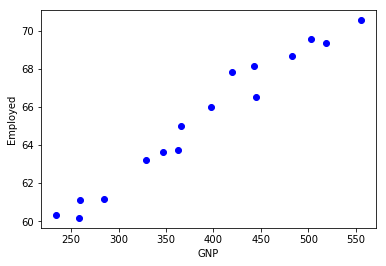

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Import data
raw_data = """
Year,Employed,GNP
1947,60.323,234.289
1948,61.122,259.426
1949,60.171,258.054
1950,61.187,284.599
1951,63.221,328.975
1952,63.639,346.999
1953,64.989,365.385
1954,63.761,363.112
1955,66.019,397.469
1956,67.857,419.18
1957,68.169,442.769
1958,66.513,444.546
1959,68.655,482.704
1960,69.564,502.601
1961,69.331,518.173
1962,70.551,554.894"""

data = []
for line in raw_data.splitlines()[2:]:
    words = line.split(',')
    data.append(words)
data = np.array(data, dtype=np.float)
n_obs = data.shape[0]
plt.plot(data[:, 2], data[:, 1], 'bo')
plt.xlabel("GNP")
plt.ylabel("Employed")

In [9]:
x=data[:,2].reshape(-1,1)
y=data[:,1].reshape(-1,1)

In [10]:
x0=np.concatenate((np.ones(x.shape[0]).reshape(-1,1), x), axis=1)

In [11]:
b_hat=np.dot(np.dot(np.linalg.inv(np.dot(x0.T,x0)), x0.T), y)

In [12]:
x_new = np.linspace(200, 600, 16).reshape(-1,1)
x0_new=np.concatenate((np.ones(x_new.shape[0]).reshape(-1,1), x_new), axis=1)
y_hat=np.dot(x0_new,b_hat)

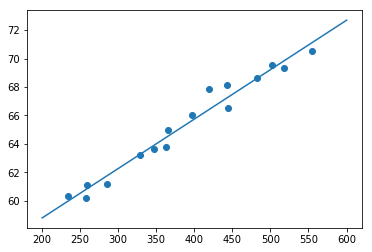

In [13]:
plt.scatter(x, y)
plt.plot(x0_new[:,1], y_hat)

In [14]:
from sklearn.linear_model import LinearRegression
x=data[:, 2].reshape(-1,1)
y=data[:,1].reshape(-1,1)
model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

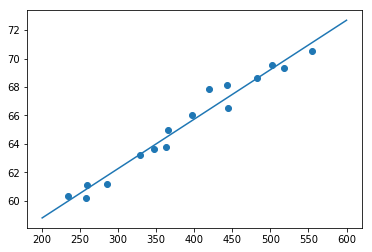

In [15]:
x_new = np.linspace(200, 600, 100)
y_new = model.predict(x_new[:, None])
plt.scatter(x, y)
plt.plot(x_new, y_new)

In [16]:
np.linspace(0, 30, 100)

array([  0.        ,   0.3030303 ,   0.60606061,   0.90909091,
         1.21212121,   1.51515152,   1.81818182,   2.12121212,
         2.42424242,   2.72727273,   3.03030303,   3.33333333,
         3.63636364,   3.93939394,   4.24242424,   4.54545455,
         4.84848485,   5.15151515,   5.45454545,   5.75757576,
         6.06060606,   6.36363636,   6.66666667,   6.96969697,
         7.27272727,   7.57575758,   7.87878788,   8.18181818,
         8.48484848,   8.78787879,   9.09090909,   9.39393939,
         9.6969697 ,  10.        ,  10.3030303 ,  10.60606061,
        10.90909091,  11.21212121,  11.51515152,  11.81818182,
        12.12121212,  12.42424242,  12.72727273,  13.03030303,
        13.33333333,  13.63636364,  13.93939394,  14.24242424,
        14.54545455,  14.84848485,  15.15151515,  15.45454545,
        15.75757576,  16.06060606,  16.36363636,  16.66666667,
        16.96969697,  17.27272727,  17.57575758,  17.87878788,
        18.18181818,  18.48484848,  18.78787879,  19.09

# Exercise 01.3

Analyze the baby names dataset using pandas

In [17]:
import pandas as pd
# Load dataset
import zipfile
with zipfile.ZipFile('../datasets/baby-names2.csv.zip', 'r') as z:
    f = z.open('baby-names2.csv')
    names = pd.io.parsers.read_table(f, sep=',')

In [18]:
names.head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


In [19]:
names[names.year == 1993].head()   

,year,name,prop,sex,soundex
113000,1993,Michael,0.024010,boy,M240
113001,1993,Christopher,0.018572,boy,C623
113002,1993,Matthew,0.017332,boy,M300
113003,1993,Joshua,0.016268,boy,J200
113004,1993,Tyler,0.014439,boy,T460


### segment the data into boy and girl names

In [20]:
boys = names[names.sex == 'boy'].copy()    
girls = names[names.sex == 'girl'].copy()

### Analyzing the popularity of a name over time

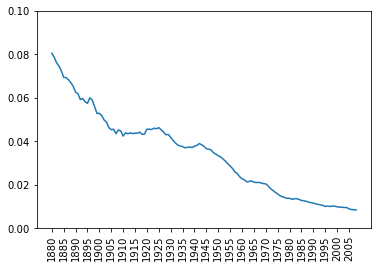

In [21]:
william = boys[boys['name']=='William']

plt.plot(range(william.shape[0]), william['prop'])
plt.xticks(range(william.shape[0])[::5], william['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

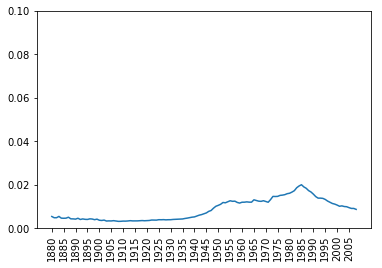

In [22]:
Daniel = boys[boys['name']=='Daniel']

plt.plot(range(Daniel.shape[0]), Daniel['prop'])
plt.xticks(range(Daniel.shape[0])[::5], Daniel['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

# Exercise 01.3

Which has been the most popular boy name every decade?

In [23]:
boys.groupby([(boys.year//10)*10])["name", "prop"].first()

,name,prop
year,,
1880,John,0.081541
1890,John,0.071034
1900,John,0.060619
1910,John,0.054914
1920,John,0.051710
1930,Robert,0.055021
1940,James,0.052662
1950,James,0.047336
1960,David,0.039669


# Exercise 01.4

Which has been the most popular girl name?


In [24]:
girls.groupby([(girls.year//10)*10])["name", "prop"].first()

,name,prop
year,,
1880,Mary,0.072381
1890,Mary,0.059892
1900,Mary,0.052567
1910,Mary,0.054448
1920,Mary,0.057069
1930,Mary,0.054969
1940,Mary,0.047587
1950,Linda,0.045724
1960,Mary,0.024750


# Exercise 01.5

What is the most popular new girl name? (new is a name that appears only in the 2000's)

In [25]:
girls[girls.year >= 2000].groupby([(girls.year//10)*10])["name", "prop"].first()

,name,prop
year,,
2000,Emily,0.013017
